In [1]:
%pip install transformers[torch] pandas scikit-learn matplotlib seaborn accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
%pip install --upgrade transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.8.1
    Uninstalling accelerate-1.8.1:
      Successfully uninstalled accelerate-1.8.1


In [3]:
%pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


Attempting to load data from: /content/drive/MyDrive/FYP/training_data.json
Data loaded and parsed successfully!

--- Data Overview ---
Original label distribution:
label
Premise              110
Claim                 84
Non-Argumentative     47
Name: count, dtype: int64

--- Preparing Data for Model ---

--- Loading roberta-base model and tokenizer ---

--- Initializing RoBERTa-base Model ---


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



--- Starting Model Training ---


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,0.344300,0.489174,0.836735,0.836357,0.844606,0.836735



--- Training Finished ---

--- Final Evaluation on Test Set ---


{'eval_loss': 0.48917412757873535, 'eval_accuracy': 0.8367346938775511, 'eval_f1': 0.8363565055397587, 'eval_precision': 0.8446064139941691, 'eval_recall': 0.8367346938775511, 'eval_runtime': 7.552, 'eval_samples_per_second': 6.488, 'eval_steps_per_second': 0.53, 'epoch': 5.0}

Model and tokenizer saved to ./legal_argument_model_roberta_base

--- Example Prediction ---
Text: 'The defendant's actions were clearly in violation of the contract terms.'
Predicted Label: Premise

--- Generating Confusion Matrix ---


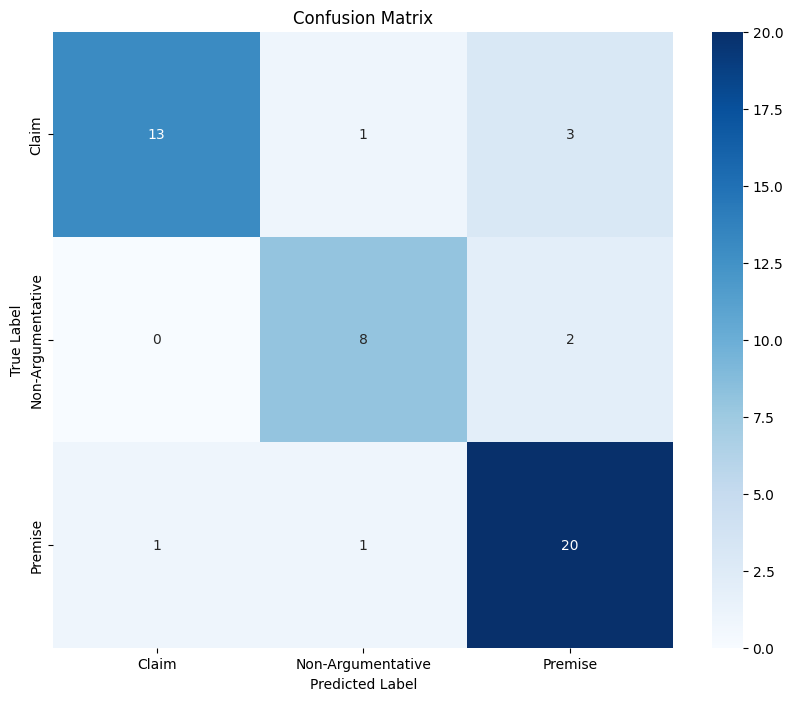


--- Classification Report ---
                   precision    recall  f1-score   support

            Claim       0.93      0.76      0.84        17
Non-Argumentative       0.80      0.80      0.80        10
          Premise       0.80      0.91      0.85        22

         accuracy                           0.84        49
        macro avg       0.84      0.82      0.83        49
     weighted avg       0.84      0.84      0.84        49



In [12]:
# Step 0: Install required packages
%pip install -q pandas numpy scikit-learn transformers[torch] datasets matplotlib seaborn

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import json
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Step 2: Data Loading Function
def load_data(file_path):
    """
    Load data from a JSON file.
    """
    print(f"Attempting to load data from: {file_path}")
    if not os.path.exists(file_path):
        print(f"Error: File not found at '{file_path}'")
        print("Creating a dummy /content/drive/MyDrive/FYP/training_data.json' for demonstration.")
        os.makedirs('resources', exist_ok=True)
        dummy_data = {
            "training_data": [
                {"text": "The first claim is valid.", "type": "Claim"},
                {"text": "The second claim is also valid.", "type": "Claim"},
                {"text": "The first premise is a fact.", "type": "Premise"},
                {"text": "The second premise is an opinion.", "type": "Premise"},
                {"text": "This sentence is just background info.", "type": "Non-Argumentative"}
            ]
        }
        with open(file_path, 'w') as f:
            json.dump(dummy_data, f, indent=2)

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        if isinstance(data, dict):
            for key in ['training_data', 'data', 'records']:
                if key in data and isinstance(data[key], list):
                    records = data[key]
                    break
            else:
                raise ValueError("JSON is a dict but no list key was found.")
        elif isinstance(data, list):
            records = data
        else:
            raise TypeError("Unsupported JSON format.")

        df = pd.DataFrame(records)
        if 'type' in df.columns:
            df.rename(columns={'type': 'label'}, inplace=True)
        if not all(col in df.columns for col in ['text', 'label']):
            raise ValueError("Records must contain 'text' and 'type'/'label' keys.")
        print("Data loaded and parsed successfully!")
        return df
    except Exception as e:
        print(f"Error loading or processing data: {str(e)}")
        return None

# Step 3: Main Execution Block
file_path = '/content/drive/MyDrive/FYP/training_data.json'
df = load_data(file_path)

if df is not None and not df.empty:
    print("\n--- Data Overview ---")
    print("Original label distribution:")
    print(df['label'].value_counts())

    # Handle classes with only one member
    label_counts = df['label'].value_counts()
    minority_classes = label_counts[label_counts < 2].index.tolist()

    if minority_classes:
        print(f"\nWarning: The following classes have only 1 sample: {minority_classes}")
        print("Duplicating these samples to allow for stratified splitting.")

        records_to_add = []
        for cls in minority_classes:
            records_to_add.append(df[df['label'] == cls].iloc[0])

        df = pd.concat([df] + [pd.DataFrame([rec]) for rec in records_to_add], ignore_index=True)

        print("\nNew label distribution after duplication:")
        print(df['label'].value_counts())


    # Data Preparation
    print("\n--- Preparing Data for Model ---")
    labels = sorted(df['label'].unique().tolist())
    label_to_id = {label: i for i, label in enumerate(labels)}
    id_to_label = {i: label for label, i in label_to_id.items()}
    df['label_id'] = df['label'].map(label_to_id)

    # Split data
    train_texts, test_texts, train_labels, test_labels = train_test_split(
        df['text'].tolist(),
        df['label_id'].tolist(),
        test_size=0.2,
        random_state=42,
        stratify=df['label_id']
    )

    # Use RoBERTa-base
    model_name = "roberta-base"
    print(f"\n--- Loading {model_name} model and tokenizer ---")

    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Tokenize datasets
    train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
    test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=256)

    class LegalDataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx])
            return item

        def __len__(self):
            return len(self.labels)

    train_dataset = LegalDataset(train_encodings, train_labels)
    test_dataset = LegalDataset(test_encodings, test_labels)

    # Initialize model with gradient checkpointing
    print("\n--- Initializing RoBERTa-base Model ---")
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(id_to_label),
        id2label=id_to_label,
        label2id=label_to_id,
        ignore_mismatched_sizes=True
    )

    # Enable gradient checkpointing to save memory
    model.gradient_checkpointing_enable()

    # Metrics function
    def compute_metrics(pred):
        labels = pred.label_ids
        preds = pred.predictions.argmax(-1)
        precision, recall, f1, _ = precision_recall_fscore_support(
            labels, preds, average='weighted', zero_division=0
        )
        acc = accuracy_score(labels, preds)
        return {
            'accuracy': acc,
            'f1': f1,
            'precision': precision,
            'recall': recall
        }

    # Training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=5,
        per_device_train_batch_size=8,  # Increased for RoBERTa-base
        per_device_eval_batch_size=16,
        warmup_steps=100,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        eval_strategy="steps",
        eval_steps=100,
        save_strategy="steps",
        save_steps=100,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,
        seed=42,
        fp16=True,  # Enable mixed precision
        gradient_accumulation_steps=1,  # Reduced for RoBERTa-base
        report_to="none"  # Disable external reporting
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    print("\n--- Starting Model Training ---")
    trainer.train()
    print("\n--- Training Finished ---")

    # Evaluate the model
    print("\n--- Final Evaluation on Test Set ---")
    eval_results = trainer.evaluate()
    print(eval_results)

    # Save the model and tokenizer
    output_dir = "./legal_argument_model_roberta_base"
    os.makedirs(output_dir, exist_ok=True)
    trainer.save_model(output_dir)
    tokenizer.save_pretrained(output_dir)
    print(f"\nModel and tokenizer saved to {output_dir}")

    # Function to make predictions
    def predict(text, model_path, tokenizer_path):
        # Load model and tokenizer
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
        tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

        # Tokenize input
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=256)

        # Get predictions
        with torch.no_grad():
            outputs = model(**inputs)

        # Get predicted class
        predicted_class_id = torch.argmax(outputs.logits, dim=1).item()
        return model.config.id2label[predicted_class_id]

    # Example prediction
    example_text = "The defendant's actions were clearly in violation of the contract terms."
    predicted_label = predict(example_text, output_dir, output_dir)
    print(f"\n--- Example Prediction ---")
    print(f"Text: '{example_text}'")
    print(f"Predicted Label: {predicted_label}")

    # Generate and plot confusion matrix
    print("\n--- Generating Confusion Matrix ---")
    predictions = trainer.predict(test_dataset)
    y_pred = np.argmax(predictions.predictions, axis=1)
    y_true = predictions.label_ids

    # Get class names from id_to_label
    class_names = [id_to_label[i] for i in sorted(id_to_label.keys())]

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Print classification report
    from sklearn.metrics import classification_report
    print("\n--- Classification Report ---")
    print(classification_report(y_true, y_pred, target_names=class_names))

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
